## Random Forest Classification

## Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc("axes", labelsize = 14)
mpl.rc("xtick", labelsize = 12)
mpl.rc("ytick", labelsize = 12)

import warnings
warnings.filterwarnings("ignore")

## Load and Check Dataset

In [2]:
df = pd.read_csv("penguins.csv")

In [3]:
df.head() # bill : gaga

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [4]:
df.columns

Index(['Unnamed: 0', 'species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

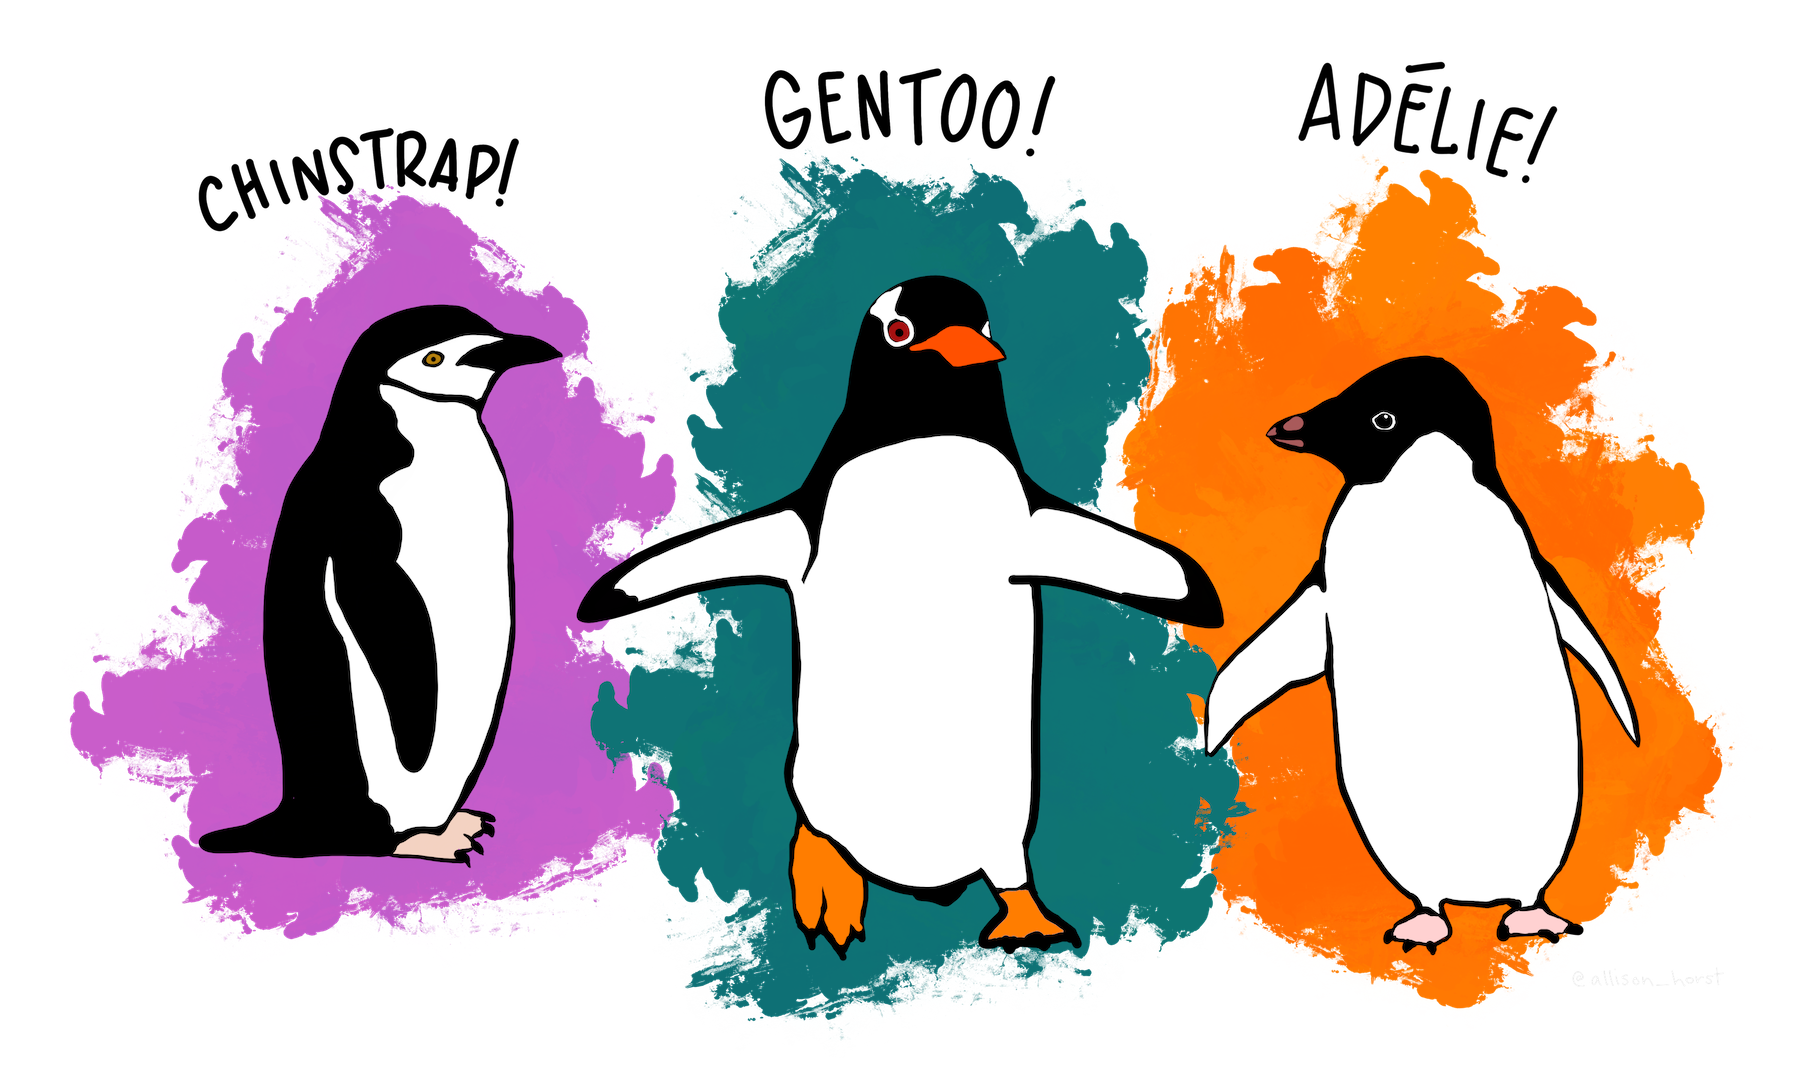

In [5]:
df.shape

(344, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [7]:
df["species"].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [8]:
df[df["sex"].isna()]

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
8,9,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,10,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007
10,11,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,2007
11,12,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN,2007
47,48,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
178,179,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN,2007
218,219,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN,2008
256,257,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN,2009
268,269,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN,2009


* I'll drop record 3 and 271 since most of their data is missing
* We will explore ways to deal with the rest of the missing values

In [9]:
df.drop(index = [3, 271], inplace= True) # drop records inplace
df.reset_index(inplace= True, drop = True)
df.drop(columns= "Unnamed: 0", inplace = True)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [10]:
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  9
year                 0
dtype: int64

* We could drop these variables, however lets try to see if we can impute them using another approach later on
* Lets examine the data further to see if we can find a good method for this
* I'll drop the year column since it won't be very useful for this task

In [11]:
df.drop(columns= "year", inplace = True)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


## Exploratory Data Analysis & Visualization

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
bill_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


In [13]:
import scipy.stats as stats

In [14]:
# print skewness of each attribute
for (colName, colData) in df[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]].iteritems():#values yerine iteritems kullandık bu sefer
    print("Feature name: {0}, Skewness: {1}".format(colName, stats.skew(colData)))

Feature name: bill_length_mm, Skewness: 0.05288480859327655
Feature name: bill_depth_mm, Skewness: -0.14283462620259435
Feature name: flipper_length_mm, Skewness: 0.3441638335300089
Feature name: body_mass_g, Skewness: 0.4682639641669921


In [15]:
# print Kurtosis of each attribute
for (colName, colData) in df[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]].iteritems():
    print("Feature name: {0}, Skewness: {1}".format(colName, stats.kurtosis(colData)))

Feature name: bill_length_mm, Skewness: -0.880764584838206
Feature name: bill_depth_mm, Skewness: -0.911154686323207
Feature name: flipper_length_mm, Skewness: -0.987434426797829
Feature name: body_mass_g, Skewness: -0.7262425917239979


In [16]:
df.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


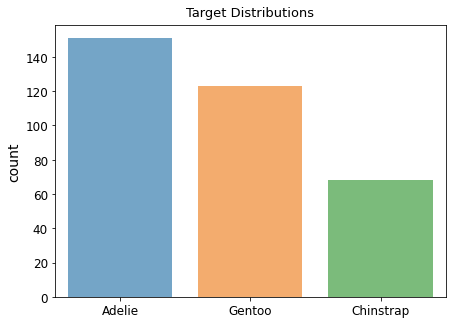

In [17]:
plt.figure(figsize= (7, 5))
sns.countplot(x = df["species"], alpha = 0.65, saturation = 0.85)
plt.title("Target Distributions", size = 13, y = 1.01)
plt.xlabel("")
plt.tick_params(axis = "both", labelsize = 12)
plt.show()

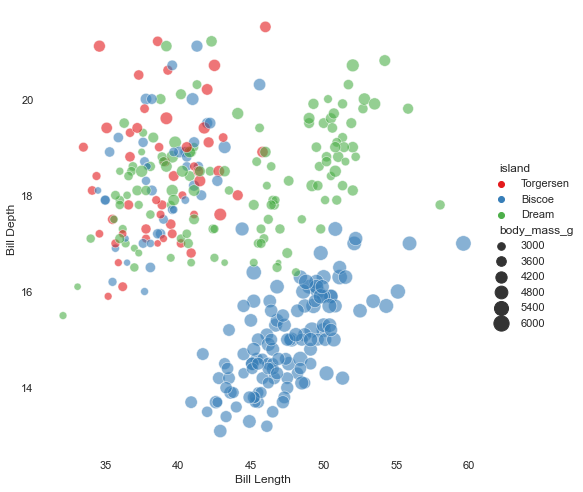

In [18]:
sns.set_theme(style="white")
g = sns.relplot(data=df, alpha = 0.6,
                x="bill_length_mm", y="bill_depth_mm",
                hue="island", size="body_mass_g",#4 değişkeni de scatterda görmüş olduk.
                palette="Set1", sizes=(40, 250),height = 7)

g.despine(left=True, bottom=True) # removes axis spines
g.set_axis_labels("Bill Length", "Bill Depth")
plt.show()

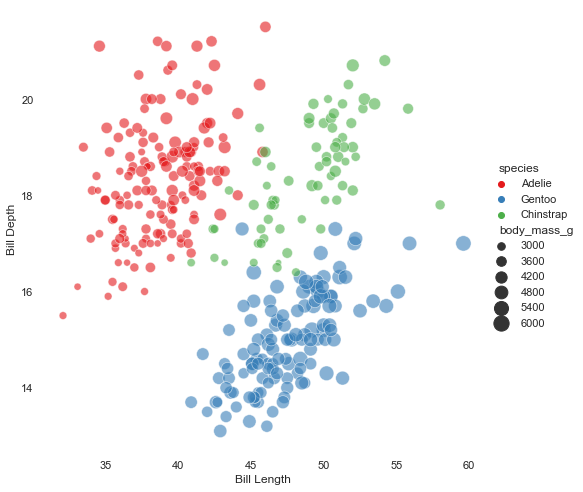

In [19]:
sns.set_theme(style="white")
g = sns.relplot(data=df, alpha = 0.6,
                x="bill_length_mm", y="bill_depth_mm",
                hue="species", size="body_mass_g",
                palette="Set1", sizes=(40, 250),height = 7)

g.despine(left=True, bottom=True) # removes axis spines
g.set_axis_labels("Bill Length", "Bill Depth")
plt.show()

In [20]:
df.groupby(["island", "species"])[["species"]].count()

species
island    species           
Biscoe    Adelie          44
          Gentoo         123
Dream     Adelie          56
          Chinstrap       68
Torgersen Adelie          51

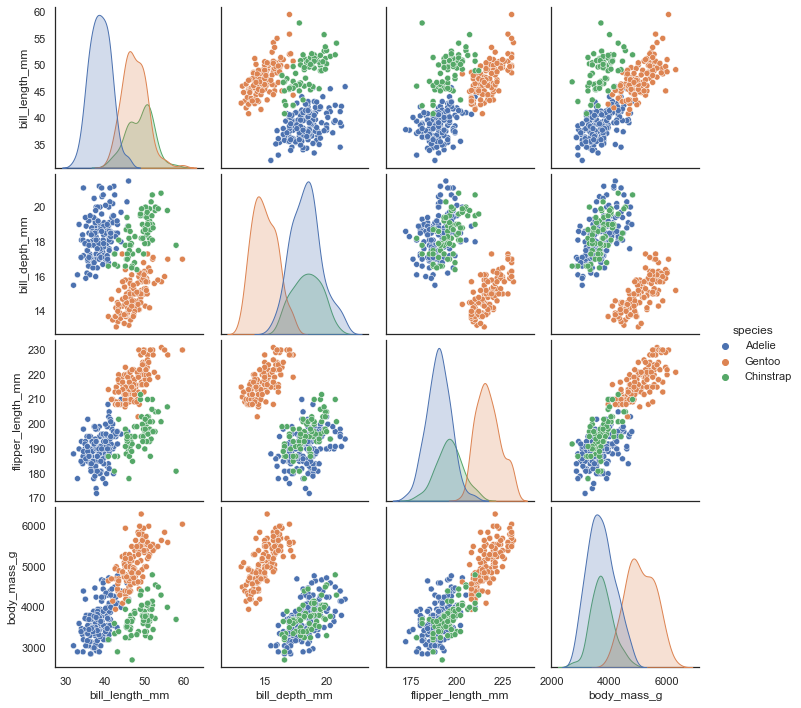

In [21]:
sns.pairplot(df, hue = "species")
plt.show()

## Filling Missing Values in Sex Column

In [22]:
sex_map = {"male": 0,
           "female": 1}#1 ve 0 haline getirmenin farklı bir yolu,replace yerine bunu kullandık.
sex_map

{'male': 0, 'female': 1}

In [23]:
df2 = df.copy()#df2ye bir adet kopyalaık dfnin aynından

In [ ]:
df2

In [24]:
df2["Sex"] = df2["sex"].map(sex_map)
df2.drop(columns= ["species", "island", "sex"], inplace = True)

In [25]:
df2

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Sex
0,39.1,18.7,181.0,3750.0,0.0
1,39.5,17.4,186.0,3800.0,1.0
2,40.3,18.0,195.0,3250.0,1.0
3,36.7,19.3,193.0,3450.0,1.0
4,39.3,20.6,190.0,3650.0,0.0
...,...,...,...,...,...
337,55.8,19.8,207.0,4000.0,0.0
338,43.5,18.1,202.0,3400.0,1.0
339,49.6,18.2,193.0,3775.0,0.0
340,50.8,19.0,210.0,4100.0,0.0


In [26]:
df_array_imp = np.array(df2)#scale edebilmek için ilk adım arraya dönüştürmek.df üstünden de olur ama böyle daha hızlıymış.DLde hep array yaparak kullanacakmışız

In [27]:
df_array_imp

array([[3.910e+01, 1.870e+01, 1.810e+02, 3.750e+03, 0.000e+00],
       [3.950e+01, 1.740e+01, 1.860e+02, 3.800e+03, 1.000e+00],
       [4.030e+01, 1.800e+01, 1.950e+02, 3.250e+03, 1.000e+00],
       ...,
       [4.960e+01, 1.820e+01, 1.930e+02, 3.775e+03, 0.000e+00],
       [5.080e+01, 1.900e+01, 2.100e+02, 4.100e+03, 0.000e+00],
       [5.020e+01, 1.870e+01, 1.980e+02, 3.775e+03, 1.000e+00]])

In [28]:
df_array_imp.shape

(342, 5)

In [29]:
from sklearn.preprocessing import MinMaxScaler #boşlukları doldurmak istiyoruz,target value 1-0 ise min max kullanmak mantıklı. Min max ile scale edip öyle dolduracağ
sc = MinMaxScaler()#burda sexi y yapıp modele boş sexleri tahmin ettireceğiz.

In [31]:
array_norm = sc.fit_transform(df_array_imp)
array_norm#(yukarıda 3-4 olanlar hep 0-1 arasına girdi.)

array([[0.25454545, 0.66666667, 0.15254237, 0.29166667, 0.        ],
       [0.26909091, 0.51190476, 0.23728814, 0.30555556, 1.        ],
       [0.29818182, 0.58333333, 0.38983051, 0.15277778, 1.        ],
       ...,
       [0.63636364, 0.60714286, 0.3559322 , 0.29861111, 0.        ],
       [0.68      , 0.70238095, 0.6440678 , 0.38888889, 0.        ],
       [0.65818182, 0.66666667, 0.44067797, 0.29861111, 1.        ]])

In [32]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors= 4)#4 tane ximiz var diye mi?
df_array_imp = imputer.fit_transform(array_norm)

In [36]:
df_array_imp

array([[0.25454545, 0.66666667, 0.15254237, 0.29166667, 0.        ],
       [0.26909091, 0.51190476, 0.23728814, 0.30555556, 1.        ],
       [0.29818182, 0.58333333, 0.38983051, 0.15277778, 1.        ],
       ...,
       [0.63636364, 0.60714286, 0.3559322 , 0.29861111, 0.        ],
       [0.68      , 0.70238095, 0.6440678 , 0.38888889, 0.        ],
       [0.65818182, 0.66666667, 0.44067797, 0.29861111, 1.        ]])

In [33]:
## df imputed isimli yeni bir dataframe oluşturuyoruz
df_imputed = pd.DataFrame(df_array_imp, columns = ["bill_length", "bill_depth_mm", "flipper_lenth_mm", "body_mass_g", "sex"])

In [37]:
df_imputed

,bill_length,bill_depth_mm,flipper_lenth_mm,body_mass_g,sex
0,0.254545,0.666667,0.152542,0.291667,0.0
1,0.269091,0.511905,0.237288,0.305556,1.0
2,0.298182,0.583333,0.389831,0.152778,1.0
3,0.167273,0.738095,0.355932,0.208333,1.0
4,0.261818,0.892857,0.305085,0.263889,0.0
...,...,...,...,...,...
337,0.861818,0.797619,0.593220,0.361111,0.0
338,0.414545,0.595238,0.508475,0.194444,1.0
339,0.636364,0.607143,0.355932,0.298611,0.0
340,0.680000,0.702381,0.644068,0.388889,0.0


In [34]:
# imputed datayı(değiştirdiğimiz datayı) orjinal ,scale etmediğim datanın içine kaydediyoruz-sexi overrite ettik.imputed dataframei bura
df["sex"] = df_imputed["sex"].astype(int)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,0


In [35]:
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [38]:
df["island"] = df["island"].astype("category")#adaları ayırıyoruz.typeı category yaptık ki get dummies fonksiyonunu kullanabilelim
df = pd.get_dummies(df, columns= ["island"])
df.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,0,0,0,1
1,Adelie,39.5,17.4,186.0,3800.0,1,0,0,1
2,Adelie,40.3,18.0,195.0,3250.0,1,0,0,1
3,Adelie,36.7,19.3,193.0,3450.0,1,0,0,1
4,Adelie,39.3,20.6,190.0,3650.0,0,0,0,1


## Determine Dependent and Independent Variables

In [39]:
X = df.drop("species", axis = 1)

y = df["species"]

In [40]:
X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen
0,39.1,18.7,181.0,3750.0,0,0,0,1
1,39.5,17.4,186.0,3800.0,1,0,0,1
2,40.3,18.0,195.0,3250.0,1,0,0,1
3,36.7,19.3,193.0,3450.0,1,0,0,1
4,39.3,20.6,190.0,3650.0,0,0,0,1
...,...,...,...,...,...,...,...,...
337,55.8,19.8,207.0,4000.0,0,0,1,0
338,43.5,18.1,202.0,3400.0,1,0,1,0
339,49.6,18.2,193.0,3775.0,0,0,1,0
340,50.8,19.0,210.0,4100.0,0,0,1,0


In [41]:
y

0         Adelie
1         Adelie
2         Adelie
3         Adelie
4         Adelie
         ...    
337    Chinstrap
338    Chinstrap
339    Chinstrap
340    Chinstrap
341    Chinstrap
Name: species, Length: 342, dtype: object

In [42]:
from sklearn.preprocessing import LabelEncoder#burda rakama dönüştürmek için labelencoder kullandık,dummy olmaz çünkü y değeri bu,tek bağımlı değişken olabilir.
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [43]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Scaling and Split

In [44]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

In [45]:
X = sc.fit_transform(X)

In [46]:
X

array([[0.25454545, 0.66666667, 0.15254237, ..., 0.        , 0.        ,
        1.        ],
       [0.26909091, 0.51190476, 0.23728814, ..., 0.        , 0.        ,
        1.        ],
       [0.29818182, 0.58333333, 0.38983051, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.63636364, 0.60714286, 0.3559322 , ..., 0.        , 1.        ,
        0.        ],
       [0.68      , 0.70238095, 0.6440678 , ..., 0.        , 1.        ,
        0.        ],
       [0.65818182, 0.66666667, 0.44067797, ..., 0.        , 1.        ,
        0.        ]])

In [57]:
pd.DataFrame(X).describe()#bağımsız değişkenlerimiz x0,x1........x7 oldu. 

,0,1,2,3,4,5,6,7
count,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,0.429888,0.482282,0.490088,0.417154,0.500000,0.488304,0.362573,0.149123
std,0.198530,0.235094,0.238334,0.222765,0.500733,0.500596,0.481447,0.356731
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.259091,0.297619,0.305085,0.236111,0.000000,0.000000,0.000000,0.000000
50%,0.449091,0.500000,0.423729,0.375000,0.500000,0.000000,0.000000,0.000000
75%,0.596364,0.666667,0.694915,0.569444,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [49]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))## Modelling and Evaluating

In [50]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  P

In [53]:
model = RandomForestClassifier(random_state= 42)

In [54]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [55]:
y_pred = model.predict(X_test)

In [56]:
y_train_pred = model.predict(X_train)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, accuracy_score

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
plot_confusion_matrix(model, X_test, y_test);

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
print(classification_report(y_train, y_train_pred))

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate

In [ ]:
model = RandomForestClassifier(random_state= 42)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

## GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model = RandomForestClassifier(random_state=42)

In [ ]:
param_grid = {"n_estimators":[10, 50],
              "max_depth": [None, 4, 5, 6, 7,8],
              "min_samples_leaf": [1, 2, 3, 4],
              "min_samples_split": [2, 3, 5, 6],
              "max_features":['auto', X.shape[1]/3, 2, 4]}

In [ ]:

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='accuracy',
                          n_jobs = -1)

In [ ]:
grid_model.fit(X_train,y_train)

In [ ]:
grid_model.best_estimator_

In [ ]:
grid_model.best_params_

In [ ]:
grid_score =pd.DataFrame(grid_model.cv_results_)
grid_score

In [ ]:
grid_model.best_score_